<a href="https://colab.research.google.com/github/atultiwari/yolov8-cam/blob/main/YOLOv8_Explainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/atultiwari/yolov8-cam.git

Cloning into 'yolov8-cam'...
remote: Enumerating objects: 586, done.
remote: Counting objects: 100% (586/586), done.
remote: Compressing objects: 100% (574/574), done.
remote: Total 586 (delta 6), reused 582 (delta 5), pack-reused 0
Receiving objects: 100% (586/586), 24.31 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
%cd yolov8-cam

/content/yolov8-cam


In [3]:
!pip install YOLOv8-Explainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-

In [11]:
!pip install ultralytics

In [16]:
model_weight = "/content/yolov8-cam/runs/detect/train/weights/best.pt"
test_image = "/content/yolov8-cam/datasets/wbc/test/images/LY_16036_jpg.rf.f845db465113edb12af8c6ce1e80d48a.jpg"

In [12]:
import ultralytics
ultralytics.__version__

'8.2.66'

In [13]:
ultralytics.checks()

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/107.7 GB disk)


In [14]:
from ultralytics import YOLO
from IPython.display import display, Image

In [19]:
!yolo task=detect mode=predict model=/content/yolov8-cam/runs/detect/train/weights/best.pt conf=0.25 source=/content/yolov8-cam/datasets/wbc/test/images/LY_16036_jpg.rf.f845db465113edb12af8c6ce1e80d48a.jpg save=True

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/yolov8-cam/datasets/wbc/test/images/LY_16036_jpg.rf.f845db465113edb12af8c6ce1e80d48a.jpg: 800x800 1 lymphocyte, 1 platelet, 446.3ms
Speed: 30.8ms preprocess, 446.3ms inference, 2.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


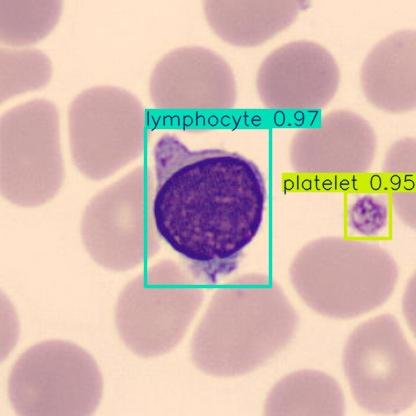

In [21]:
Image(filename=f'/content/yolov8-cam/runs/detect/predict/LY_16036_jpg.rf.f845db465113edb12af8c6ce1e80d48a.jpg', width=600)

## Attempt-1

In [5]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight=model_weight,
        conf_threshold=0.4,
        device = "cpu",
        method = "EigenCAM",
        layer=[10, 12, 14, 16, 18, -3],
        backward_type="all",
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path=test_image,
    )

display_images(imagelist)

TypeError: yolov8_heatmap.__init__() got an unexpected keyword argument 'backward_type'

## Attempt - 2

Model summary: 225 layers, 3,012,408 parameters, 0 gradients, 8.2 GFLOPs


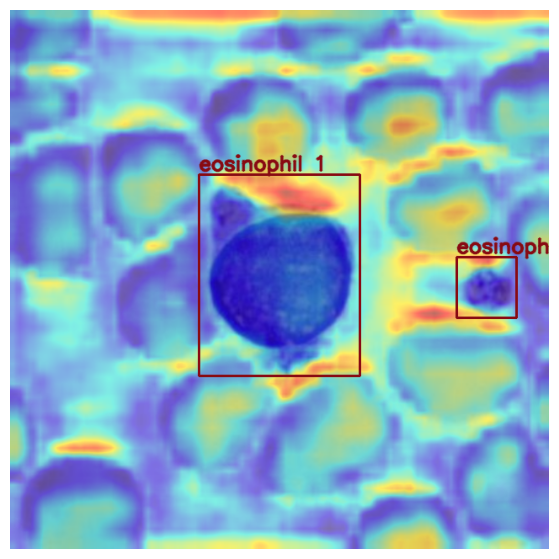

In [9]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight=model_weight,
        conf_threshold=0.4,
        method = "EigenCAM",
        layer=[10, 12, 14, 16, 18, -3],
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path=test_image,
    )

display_images(imagelist)

## Attempt-3

Model summary: 225 layers, 3,012,408 parameters, 0 gradients, 8.2 GFLOPs


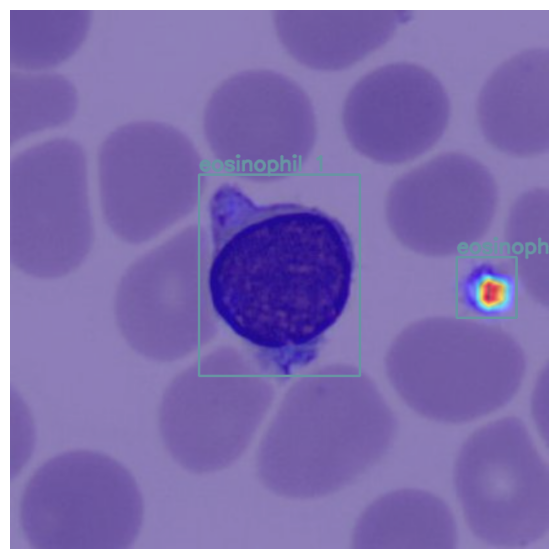

In [10]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight=model_weight,
    method="EigenGradCAM",
    layer=[-6,],
)

imagelist = model(
    img_path=test_image,
    )

display_images(imagelist)

## Attempt-4

Model summary: 225 layers, 3,012,408 parameters, 0 gradients, 8.2 GFLOPs


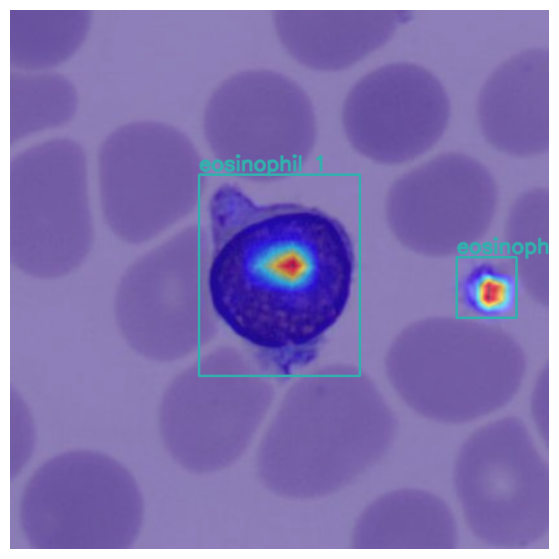

In [29]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight=model_weight,
    conf_threshold=0.25,
    method="EigenGradCAM",
    layer=[-2,-6],
)

imagelist = model(
    img_path=test_image,
    )

display_images(imagelist)